In [1]:
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

In [2]:
with open(r"dataFrames\df_idf.pkl", "rb") as f:
    my_unpickler = pickle.Unpickler(f)
    df_idf = my_unpickler.load()

df_idf.columns

Index(['id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville',
       'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces',
       'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude',
       'surface_dependances', 'surface_locaux_industriels',
       'surface_terrains_agricoles', 'surface_terrains_sols',
       'surface_terrains_nature', 'prix_m2', 'surface_dependances_sum',
       'surface_locaux_industriels_sum', 'surface_terrains_agricoles_sum',
       'surface_terrains_sols_sum', 'surface_terrains_nature_sum'],
      dtype='object')

# Choix du model si seules les coordonnées des transactions sont séléctionnées

In [3]:
X_coordinatesOnly = df_idf[['longitude', 'latitude']].values
y_coordinatesOnly = df_idf['prix_m2'].values
print(X_coordinatesOnly)

X_train_coordinatesOnly, X_test_coordinatesOnly, y_train__coordinatesOnly, y_test_coordinatesOnly = train_test_split(X_coordinatesOnly, y_coordinatesOnly, test_size=0.2, random_state=42)

[[ 2.40375064 48.83624849]
 [ 2.348148   48.86560434]
 [ 2.32468916 48.88330859]
 ...
 [ 2.21748065 48.99549225]
 [ 2.3147687  48.97772502]
 [ 2.21243488 49.0221078 ]]


In [4]:
coordinatesOnly_model_DecisionTreeRegressor = DecisionTreeRegressor(max_depth=4)
coordinatesOnly_model_DecisionTreeRegressor.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)

coordinatesOnly_model_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=50)
coordinatesOnly_model_KNeighborsRegressor.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)

coordinatesOnly_model_LinearRegression = LinearRegression()
coordinatesOnly_model_LinearRegression.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)

coordinatesOnly_model_RandomForestRegressor = RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)
coordinatesOnly_model_RandomForestRegressor.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)

RandomForestRegressor(max_depth=100, min_samples_leaf=10, n_estimators=1000)

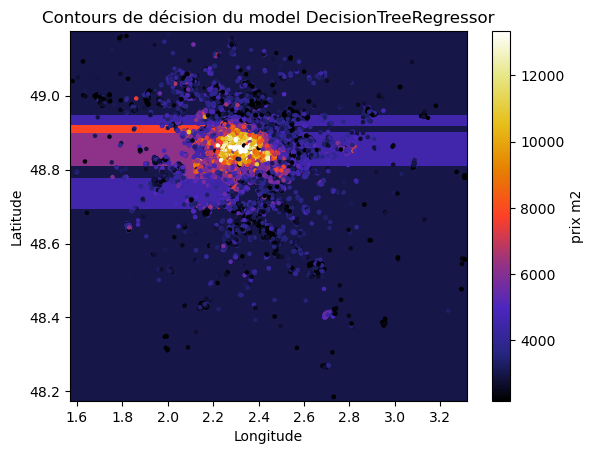

La MSE d'entrainement (sur 80% du dataset) du model DecisionTreeRegressor est d'environ 2317.81
La MSE de test (sur les 20% restant du dataset) du model DecisionTreeRegressor est d'environ 2321.58


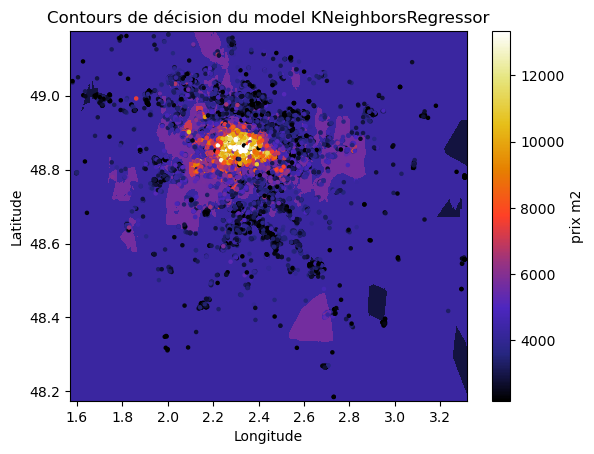

La MSE d'entrainement (sur 80% du dataset) du model KNeighborsRegressor est d'environ 1889.78
La MSE de test (sur les 20% restant du dataset) du model KNeighborsRegressor est d'environ 1936.27


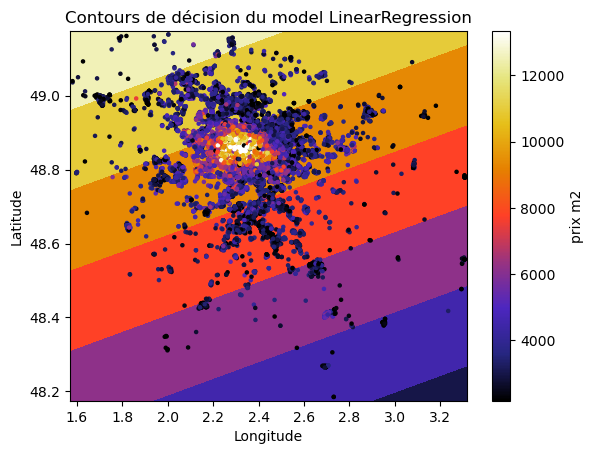

La MSE d'entrainement (sur 80% du dataset) du model LinearRegression est d'environ 3632.52
La MSE de test (sur les 20% restant du dataset) du model LinearRegression est d'environ 3657.07


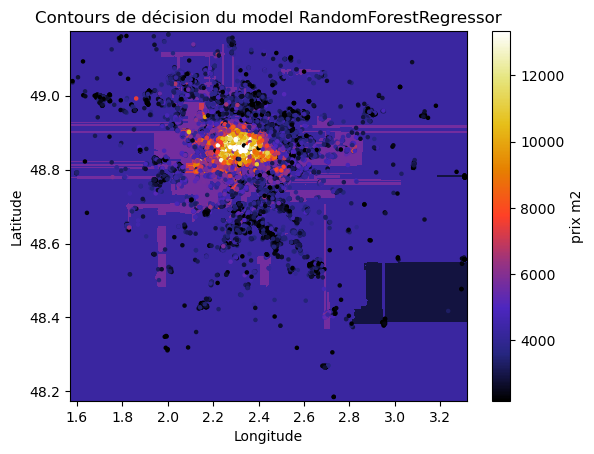

La MSE d'entrainement (sur 80% du dataset) du model RandomForestRegressor est d'environ 1663.39
La MSE de test (sur les 20% restant du dataset) du model RandomForestRegressor est d'environ 1906.24


In [5]:
def plot_with_contour(model, X, y):
    # Visualisation des contours de décision
    x_min, x_max = X[:, 0].min() - 0.01, X[:, 0].max() + 0.01
    y_min, y_max = X[:, 1].min() - 0.01, X[:, 1].max() + 0.01
        
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.001),
                        np.arange(y_min, y_max, 0.001))
        
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
        
    plt.contourf(xx, yy, Z, alpha=1, cmap='CMRmap')
        
    # Normalize the colormap to ignore extreme values
    # sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=0, vmax=20_2000,
    #                 marker='o', s=5, linewidth=1, cmap='coolwarm')
        
    sc = plt.scatter(X[:, 0], X[:, 1], c=y, vmin=np.percentile(y, 5), vmax=np.percentile(y, 95), 
                        marker='o', s=5, linewidth=1, cmap='CMRmap')
        
        
    plt.colorbar(sc, label='prix m2', orientation='vertical')
          
    plt.title(f"Contours de décision du model {str(model)[:x]}")
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.show()

models = [coordinatesOnly_model_DecisionTreeRegressor,coordinatesOnly_model_KNeighborsRegressor, coordinatesOnly_model_LinearRegression, coordinatesOnly_model_RandomForestRegressor]

for model in models :
    x = str(model).find('(')  
    plot_with_contour(model, X_test_coordinatesOnly, y_test_coordinatesOnly)
    print(f"La MSE d'entrainement (sur 80% du dataset) du model {str(model)[:x]} est d'environ {round(np.sqrt(mean_squared_error(y_train__coordinatesOnly, model.predict(X_train_coordinatesOnly))),2)}")
    print(f"La MSE de test (sur les 20% restant du dataset) du model {str(model)[:x]} est d'environ {round(np.sqrt(mean_squared_error(y_test_coordinatesOnly, model.predict(X_test_coordinatesOnly))),2)}")

In [6]:
from sklearn.model_selection import GridSearchCV

params_grid = {
                'LR': {
                    'model': LinearRegression(),
                    'params': {
                        'fit_intercept': [True, False],
                        'positive': [True, False]
                    }
                },
                'KNB': {
                    'model': KNeighborsRegressor(),
                    'params': {
                        'n_neighbors': list(range(20,80))
                    }
                },
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': [5, 10],
                        'min_samples_leaf': [50, 100]
                    }
                },
                'RFR': {
                    'model': RandomForestRegressor(n_estimators=1000),
                    'params': {
                        'max_depth': [4, 8],
                        'min_samples_leaf': [50, 100]
                        #'n_estimators': [500, 1000]
                        # paramètre retiré car demande trop de temps pour être traité
                    }
                }
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'],
                      n_jobs=-1)
    gs.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test_coordinatesOnly, gs.best_estimator_.predict(X_test_coordinatesOnly))))

Modèle: LR avec params optimaux: {'fit_intercept': True, 'positive': False} donne erreur =
3657.066603593364
Modèle: KNB avec params optimaux: {'n_neighbors': 39} donne erreur =
1936.5755735130717
Modèle: DTR avec params optimaux: {'max_depth': 10, 'min_samples_leaf': 50} donne erreur =
2009.9173767594557
Modèle: RFR avec params optimaux: {'max_depth': 8, 'min_samples_leaf': 50} donne erreur =
2056.7466416004704


In [7]:
coordinatesOnly_model_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=39)
coordinatesOnly_model_KNeighborsRegressor.fit(X_train_coordinatesOnly, y_train__coordinatesOnly)

with open("model/coordinatesOnly_model.pkl", "wb") as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(coordinatesOnly_model_KNeighborsRegressor)

# Choix du model si on ajoute le taux d'intérêt moyen du mois des transactions

In [8]:
df_tauxInterets = pd.read_csv(r'dataSources\taux_interet.csv')

df_tauxInterets['monthlyPeriod'] = df_tauxInterets['date'].str[0:7]
df_idf['monthlyPeriod'] = df_idf['date_transaction'].str[0:7]

df_idfFinal = pd.merge(df_idf, df_tauxInterets, on='monthlyPeriod', how='left')

df_idfFinal.columns

Index(['id_transaction', 'date_transaction', 'prix', 'departement', 'id_ville',
       'ville', 'code_postal', 'adresse', 'type_batiment', 'vefa', 'n_pieces',
       'surface_habitable', 'id_parcelle_cadastre', 'latitude', 'longitude',
       'surface_dependances', 'surface_locaux_industriels',
       'surface_terrains_agricoles', 'surface_terrains_sols',
       'surface_terrains_nature', 'prix_m2', 'surface_dependances_sum',
       'surface_locaux_industriels_sum', 'surface_terrains_agricoles_sum',
       'surface_terrains_sols_sum', 'surface_terrains_nature_sum',
       'monthlyPeriod', 'date', 'taux'],
      dtype='object')

In [9]:
X = df_idfFinal[['longitude', 'latitude', 'taux']].values
y = df_idfFinal['prix_m2'].values
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

[[ 2.40375064 48.83624849  1.07      ]
 [ 2.348148   48.86560434  1.07      ]
 [ 2.32468916 48.88330859  1.07      ]
 ...
 [ 2.21748065 48.99549225  2.12      ]
 [ 2.3147687  48.97772502  2.12      ]
 [ 2.21243488 49.0221078   2.12      ]]


In [15]:
from sklearn.model_selection import GridSearchCV

params_grid = {
                'LR': {
                    'model': LinearRegression(),
                    'params': {
                        'fit_intercept': [True, False],
                        'positive': [True, False]
                    }
                },
                'KNB': {
                    'model': KNeighborsRegressor(),
                    'params': {
                        'n_neighbors': list(range(20,80))
                    }
                },
                'DTR': {
                    'model': DecisionTreeRegressor(),
                    'params': {
                        'max_depth': [5, 10],
                        'min_samples_leaf': [50, 100]
                    }
                },
                'RFR': {
                    'model': RandomForestRegressor(),
                    'params': {
                        'max_depth': [50, 100],
                        'min_samples_leaf': [50, 100]
                        #'n_estimators': [500, 1000]
                        # paramètre retiré car demande trop de temps pour être traité
                    }
                }
            }

for model_name, model_config in params_grid.items():
    gs = GridSearchCV(estimator=model_config['model'], 
                      param_grid=model_config['params'],
                      n_jobs=-1)
    gs.fit(X_train, y_train)
    print(f'Modèle: {model_name} avec params optimaux: {gs.best_params_} donne erreur =')
    print(np.sqrt(mean_squared_error(y_test, gs.best_estimator_.predict(X_test))))

Modèle: LR avec params optimaux: {'fit_intercept': True, 'positive': False} donne erreur =
3656.7726777521534


KeyboardInterrupt: 

In [12]:
finalModel_KNeighborsRegressor = KNeighborsRegressor(n_neighbors=24)
finalModel_KNeighborsRegressor.fit(X_train, y_train)

with open("model/withInterestRates_model.pkl", "wb") as f:
    my_pickler = pickle.Pickler(f)
    my_pickler.dump(finalModel_KNeighborsRegressor)